In [179]:
# define simple 4th-order runge-kutta integrator
function rk4(f, x₀, tspan)
    x = zeros(length(tspan), length(x₀))
    x[1,:] = x₀
    
    for n=1:length(tspan)-1
        xₙ = x[n,:]
        dt = tspan[n+1] - tspan[n]
        k₁ = f(xₙ)
        k₂ = f(xₙ + k₁*dt/2)
        k₃ = f(xₙ + k₂*dt/2)
        k₄ = f(xₙ + k₃*dt)
        x[n+1,:] = xₙ + dt/6 * (k₁ + 2k₂ + 2k₃ + k₄)
    end
    return tspan,x    
end

function phaseplot(μ, k, T=50)

    fpendulum = x -> [x[2]; -2μ*x[2] - k^2*sin(x[1])]
    fpendulum_backward = x -> [-x[2]; 2μ*x[2] + k^2*sin(x[1])]
    tspan = 0:0.1:T
    xmax = 10
    ymax = 8
    
    xgrid = linspace(-xmax,xmax,20)
    ygrid = linspace(-ymax,ymax,20)
    dxdt = [y for y in ygrid, x in xgrid];
    dydt = [-2μ*y - k^2*sin(x) for y in ygrid, x in xgrid];

    quiver(xgrid,ygrid,dxdt,dydt)
    xlabel("x=theta")
    ylabel("y=theta'")
    title("phase plot for nonlinear damped pendulum")


    for x0 = -3pi:2*pi:xmax
        Df = [0 1 ; k^2 -2μ]
        λ,V = eig(Df)
        ϵ = 0.2
        for n in [1; 2]
            for s in  [-1; 1]
                if real(λ[n]) >= 0.0
                    t,x = rk4(fpendulum_backward, [x0; 0] + s*ϵ*V[:,n], tspan)
                    plot(x[:,1],x[:,2], "b-")
                else
                    t,x = rk4(fpendulum, [x0; 0] + s*ϵ*V[:,n], tspan)
                    plot(x[:,1],x[:,2], "r-")
                end                     
            end
        end
    end
    eqbs = zeros(4,2)
    eqbs[:,1] = -3pi:2pi:3pi+0.1
    plot(eqbs[:,1], eqbs[:,2], "ro")
    eqbs[:,1] = -2pi:2pi:4pi+0.1
    plot(eqbs[:,1], eqbs[:,2], "bo")
    
    axis("equal")
    xlim(-xmax, xmax)
    ylim(-ymax, ymax)
    
end

phaseplot (generic function with 2 methods)

## No damping, pure oscillations for $\mu = 0$.

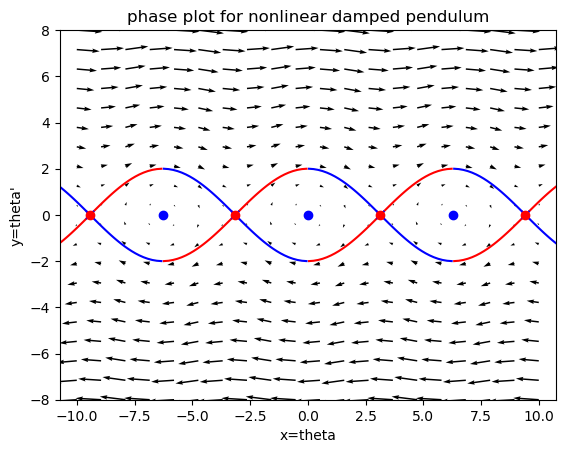

λ[1] = 0.0 + 1.0im
λ[2] = 0.0 - 1.0im


(-8, 8)

In [180]:
k = 1
μ = 0

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k, 11.1)

## Weakly damped oscillations for $\mu \ll k$

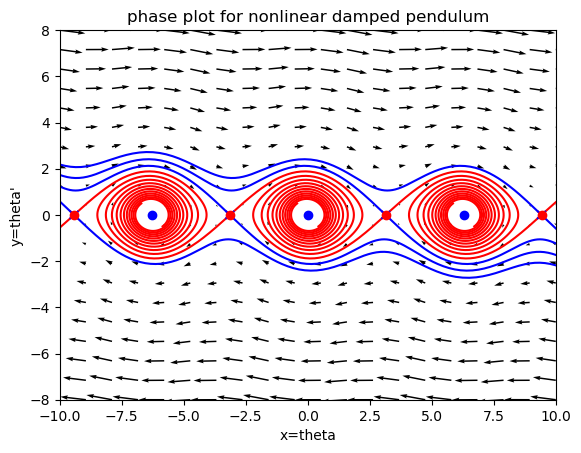

λ[1] = -0.029999999999999943 + 0.9995498987044119im
λ[2] = -0.029999999999999943 - 0.9995498987044119im


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43c7b16a50>

In [166]:
k = 1
μ = 0.03

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k)

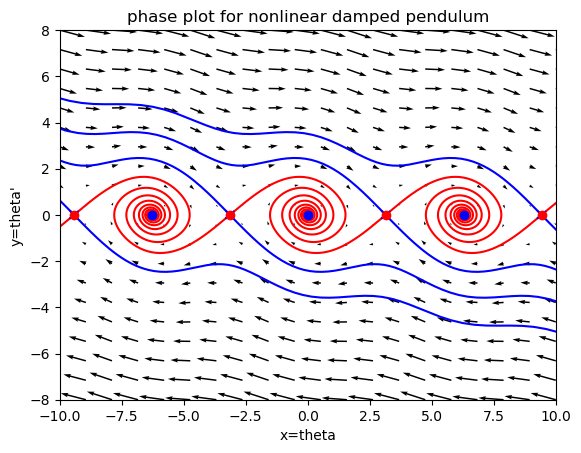

λ[1] = -0.10000000000000006 + 0.99498743710662im
λ[2] = -0.10000000000000006 - 0.99498743710662im


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43c7d5da90>

In [167]:
k = 1
μ = 0.1

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k)

## Strongly damped oscillations for $\mu \lesssim k$ 

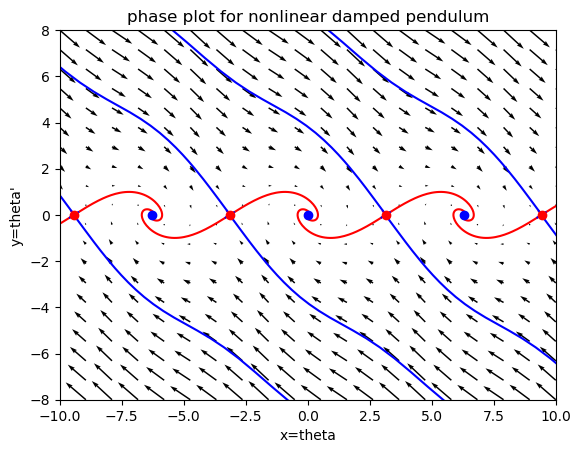

λ[1] = -0.4 + 0.916515138991168im
λ[2] = -0.4 - 0.916515138991168im


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43c7cf7590>

In [170]:
k = 1
μ = 0.4

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k)

## Critical damping, no oscillation for $\mu = k$

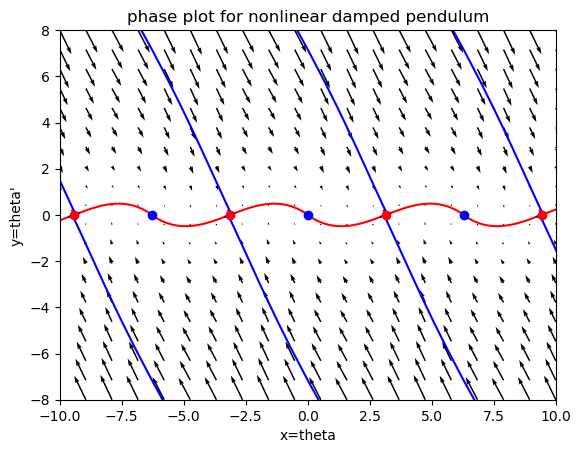

λ[1] = -1.0
λ[2] = -1.0


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f43c37f3790>

In [171]:
k = 1
μ = 1

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k)

## Overdamped, $\mu > k$.

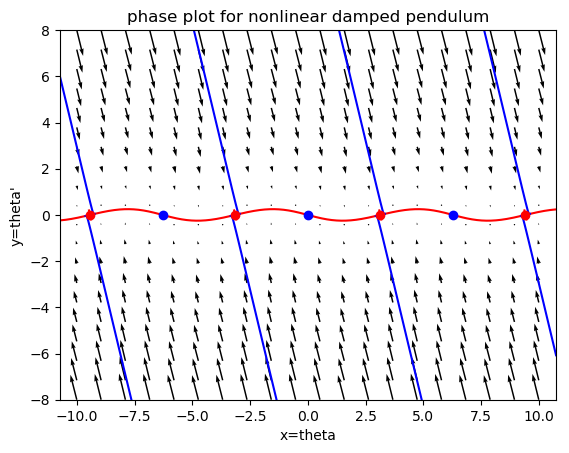

λ[1] = -0.2679491924311228
λ[2] = -3.732050807568877


(-8, 8)

In [183]:
k = 1
μ = 2

λ, V = eig([0 1; -k^2 -2μ])  # linearization about down-hanging eqbs

@show λ[1]
@show λ[2]

phaseplot(μ, k, 100)